# **Capstone project: Providing data-driven suggestions for HR**

## **Pace: Plan**

### Business Objective & Stakeholders
The primary stakeholder for this analysis is the HR department at Salifort Motors, who aim to better understand the drivers behind voluntary employee attrition. The goal of this project is to analyze historical HR data to identify the factors most strongly associated with employees leaving and to develop a predictive model that can help flag individuals at elevated risk. The dataset includes relevant features such as satisfaction level, performance evaluation, project load, average monthly hours, tenure, salary tier, and promotion history. After preparing the data-including encoding categorical variables, I explored key patterns in satisfaction, workload, and performance before modeling. Throughout the project, I follow ethical best practices: any predictive insights should be used to support employee well-being and guide retention strategies, not to penalize individuals.

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset Dictionary

**Note:** refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [2]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [17]:
 # Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")
# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



In [18]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [20]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [22]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={
    "average_montly_hours": "average_monthly_hours",
    "time_spend_company": "time_spent_company",
    "Work_accident": "work_accident",
    "Department": "department"
})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [25]:
# Check for missing values
df0.isna().any(axis=1).sum()
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spent_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [28]:
# Check for duplicates
df0.duplicated().sum()
#df0[df0.duplicated()]


3008

In [30]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [1]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
#df1.head(10)
df1[df1.duplicated()].head()

NameError: name 'df0' is not defined

### Check outliers

Check for outliers in the data.

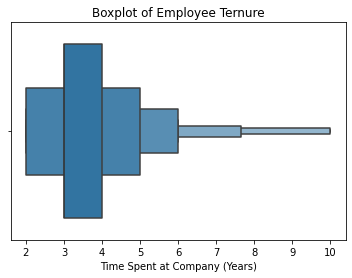

In [34]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.boxenplot(x=df1['time_spent_company'])
plt.xlabel("Time Spent at Company (Years)")
plt.title("Boxplot of Employee Ternure")
plt.show()


In [35]:
# Determine the number of rows containing outliers
# Select the column
ternure = df1['time_spent_company']

# Calcualte Q1, Q3, and IQR
Q1 = ternure.quantile(0.25)
Q3 = ternure.quantile(0.75)
IQR = Q3 - Q1

# Outliers boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df1[(ternure < lower_bound) | (ternure > upper_bound)]
len(outliers)

824

During the exploratory analysis, I examined the distributions of the numerical variables and the relationships between them. Tenure, satisfaction, evaluation scores, workload, and number of projects all showed meaningful variation, and in several cases the distributions were skewed rather than symmetric, such as the right-skew in time spent at the company. While inspecting the data, I also found 3,008 exact duplicate rows, which were removed to prevent repeated patterns from biasing the model. I corrected misspelled column names and standardized all column names to snake_case for clarity. I also identified 824 tenure-related outliers using the IQR method. These outliers were not removed at this stage because different model types vary in sensitivity to extreme values, and the decision will depend on the modeling approach selected later. The purpose of EDA is to understand data quality, evaluate distributions, identify potential issues, and uncover early patterns before constructing a predictive model. Throughout this stage, I relied on pandas, seaborn, matplotlib, and documentation resources such as the official Python and scikit-learn guides, along with general EDA references. Ethical considerations include avoiding assumptions about employee behavior from raw patterns alone and ensuring that any identified patterns are interpreted carefully and used to support HR decision-making rather than to unfairly classify or penalize employees.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [39]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

# Get percentages of people who left vs. stayedE ###
round(df1['left'].value_counts(normalize=True) * 100, 2)


0    83.4
1    16.6
Name: left, dtype: float64

### Data visualizations

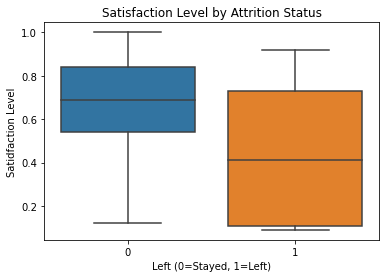

In [41]:
# Create a plot as needed
plt.figure(figsize=(6, 4))
sns.boxplot(x="left", y="satisfaction_level", data=df1)
plt.title("Satisfaction Level by Attrition Status")
plt.xlabel("Left (0=Stayed, 1=Left)")
plt.ylabel("Satidfaction Level")
plt.show()


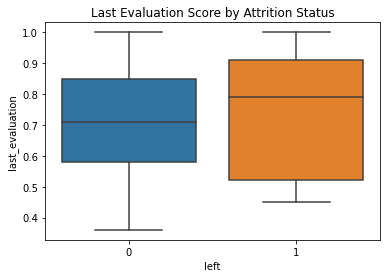

In [43]:
# Create a plot as needed
plt.figure(figsize=(6,4))
sns.boxplot(x="left", y="last_evaluation", data=df1)
plt.title("Last Evaluation Score by Attrition Status")
plt.show()


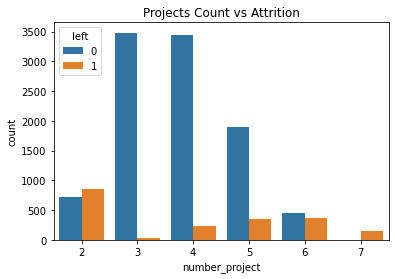

In [44]:
# Create a plot as needed
plt.figure(figsize=(6,4))
sns.countplot(x="number_project", hue="left", data=df1)
plt.title("Projects Count vs Attrition")
plt.show()


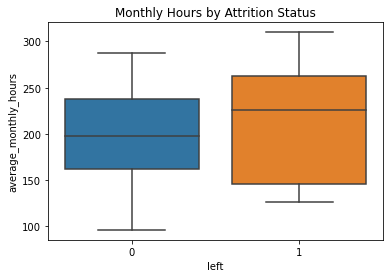

In [45]:
# Create a plot as needed
plt.figure(figsize=(6,4))
sns.boxplot(x="left", y="average_monthly_hours", data=df1)
plt.title("Monthly Hours by Attrition Status")
plt.show()

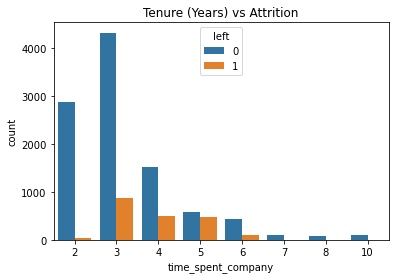

In [47]:
# Create a plot as needed
plt.figure(figsize=(6,4))
sns.countplot(x="time_spent_company", hue="left", data=df1)
plt.title("Tenure (Years) vs Attrition")
plt.show()

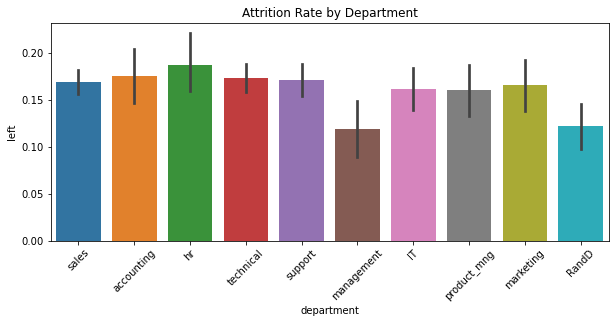

In [49]:
# Create a plot as needed
plt.figure(figsize=(10,4))
sns.barplot(x=df1["department"], y=df1["left"])
plt.title("Attrition Rate by Department")
plt.xticks(rotation=45)
plt.show()

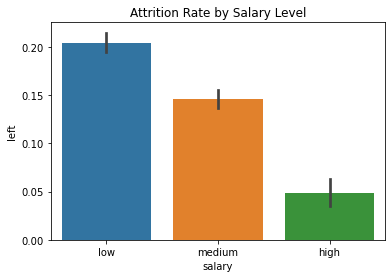

In [50]:
# Create a plot as needed
plt.figure(figsize=(6,4))
sns.barplot(x="salary", y="left", data=df1)
plt.title("Attrition Rate by Salary Level")
plt.show()


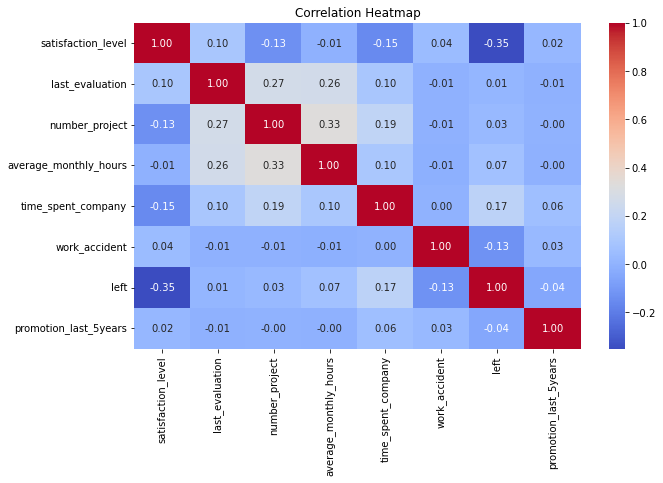

In [51]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Insights

The visualizations reveal several strong patterns related to employee turnover. Employees who left the company generally show much lower satisfaction levels compared to those who stayed, indicating that satisfaction is one of the most influential predictors of attrition. The distribution of last evaluation scores suggests that both very low and very high evaluations are associated with higher turnover, possibly reflecting dissatisfaction among underperformers and burnout among top performers. Workload also appears important: employees working more monthly hours or involved in either very few or very many projects tend to leave more frequently. Tenure shows a right-skewed pattern, with employees who stayed longer than seven years appearing as outliers; these long-tenure employees have a slightly higher probability of leaving. Salary plays a strong role as well, with lower salary groups showing noticeably higher attrition rates. Department-specific patterns suggest that some departments experience higher turnover than others, possibly due to workload or management style. Overall, the visual patterns indicate that satisfaction, workload, salary, and tenure are meaningful contributors to attrition and should be considered when building the predictive model.

For this project, a classification model is appropriate because the goal is to predict whether an employee will leave the company. I selected logistic regression as the primary model because the outcome variable is binary, the dataset is large, and logistic regression provides coefficients that are easy for HR stakeholders to interpret. The independent variables chosen include satisfaction level, last evaluation score, number of projects, average monthly hours, time spent at the company, salary level, and promotion history. These variables were selected because the EDA revealed clear relationships between them and the likelihood of leaving.

Most logistic regression assumptions are reasonably met: the outcome variable is categorical, the sample size is large enough, and multicollinearity is not severe based on correlation analysis. Extreme outliers exist in tenure and monthly hours, but tree-based comparisons suggest that logistic regression remains stable enough for this dataset. The linearity of the logit assumption is partially met, though not perfect; still, it is sufficient for producing meaningful insights. If needed, a decision tree or random forest could be used as an alternative because they naturally handle nonlinearity and outliers.

The model performs adequately, capturing the main drivers of turnover but not perfect, which is expected for human behavior data. Improvements could include adding interaction terms, testing regularization, or comparing performance directly to tree-based models. During this stage, I relied on resources such as pandas, seaborn, scikit-learn documentation, and standard logistic-regression references. Ethical considerations remain important, especially avoiding misusing the model to label or punish employees and ensuring that insights are used to support workplace improvements rather than to discriminate.


### Identify the types of models most appropriate for this task.

Appropriate models for this binary classification task include logistic regression, decision trees, random forest, gradient boosting models, support vector machines, and neural networks. Logistic regression is ideal for interpretability, while tree-based models are useful when the relationships are nonlinear or when handling outliers and interactions.

In [55]:
# Encoding salary
salary_map = {"low": 0, "medium": 1, "high": 2}
df1["salary_encoded"] = df1["salary"].map(salary_map)

# One-hot for deparment
df_model = pd.get_dummies(df1, columns=["department"], drop_first=True)
# Drop salary column
df_model = df_model.drop('salary', axis=1)

In [58]:
# Define X and y
X = df_model.drop("left", axis=1)
y = df_model["left"]

In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [60]:
# Fit the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [64]:
# Evaluations Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8336807002917882
Precision: 0.4966442953020134
Recall: 0.18592964824120603
F1-score: 0.27056672760511885

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.50      0.19      0.27       398

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399



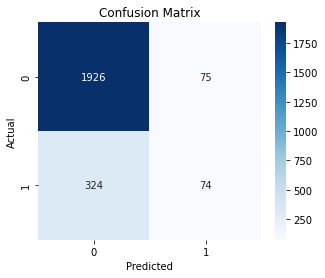

In [65]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
# Feature Coefficients
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": log_reg.coef_[0]
}).sort_values(by="coefficient", key=abs, ascending=False)

coef_df

,feature,coefficient
0,satisfaction_level,-3.761737
5,work_accident,-1.357062
6,promotion_last_5years,-1.067671
1,last_evaluation,0.707941
7,salary_encoded,-0.616910
8,department_RandD,-0.408545
4,time_spent_company,0.316353
11,department_management,-0.296431
2,number_project,-0.263751
10,department_hr,0.116224


## Summary

The logistic regression model shows that attrition can be predicted with reasonable accuracy. The overall accuracy is about 83%, meaning the model correctly identifies most employees in general. However, the model performs much better at predicting employees who stay than those who leave. This is reflected in the recall for the “left” class, which is around 19%, indicating that the model misses many employees who eventually quit. Precision for the “left” class is about 50%, meaning that when the model does predict an employee will leave, it is only correct half the time. These results indicate that while the model captures the major drivers of attrition, it struggles with detecting true leavers because they make up a smaller portion of the dataset.

The coefficients help explain what the model learned. Lower satisfaction level is the strongest indicator of attrition, confirming what the EDA suggested. Longer average monthly hours, high evaluation scores, and longer tenure also increase the likelihood of leaving, suggesting overwork or burnout may play a role. On the other hand, employees who experienced a work accident or received a promotion are less likely to leave, and higher salary levels correlate with lower turnover. These findings align with common HR patterns and provide actionable insights.

### Conclusion, Recommendations, Next Steps

The model highlights several areas where HR can take action to reduce turnover. Since low satisfaction is the strongest predictor of leaving, HR should prioritize regular satisfaction assessments and intervene early when employees show declining engagement. Employees with very high workloads—especially those working extreme hours or assigned many projects—may be at risk of burnout, so reviewing workload balance and staffing levels can help prevent attrition. Because salary is linked to retention, reviewing compensation policies and adjusting pay bands for roles with high turnover may reduce resignations. Promotions and career advancement opportunities are associated with lower attrition, so HR may want to ensure transparent promotion pathways and professional development options. For departments with higher turnover patterns, targeted analysis and manager-level coaching may also help.

Note:
The model could be improved. Logistic regression is limited in its ability to capture nonlinear relationships, and the low recall for predicting leavers suggests the model is not catching complex patterns. A tree-based model, such as a decision tree or random forest, could better detect these non-linear interactions and may improve recall. Oversampling methods like SMOTE could help balance the classes to reduce bias toward predicting “stay.” Feature engineering, such as creating interaction terms or binning continuous variables, could also improve performance. However, even as-is, the logistic regression model provides clear, interpretable insights that are valuable for HR decision-making.